In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# Generate the data
np.random.seed(12345)
data = stats.norm(7,3).rvs(100)

In [28]:
# Fit mean and SD
meanVal = np.mean(data)
stdVal = np.std(data, ddof=1)
print('Real mean: {0:5.3f}; Sample mean: {1:5.3f}'.format(7, meanVal))
print('Real SD: {0:5.3f}; Sample SD: {1:5.3f}'.format(3, stdVal))

Real mean: 7.000; Sample mean: 7.101
Real SD: 3.000; Sample SD: 3.121


In [29]:
# Prepare the plot
fig, axs = plt.subplots(1,2)
# Left plot ------------------------------------
# Plot the histogram of the data, superposed with the normal fit
xval = np.linspace(-5,20, 100)
yval = stats.norm(meanVal,stdVal).pdf(xval)

axs[0].hist(data, normed=True, color='#eeefff')
axs[0].plot(xval, yval, 'g', label='normal-fit')
axs[0].set_title('Recorded data')
axs[0].legend()

In [30]:
#Mark the mean value, as well as the value of interest 
checkVal = 6.5
axs[0].plot(checkVal, 0, marker='d', color='r', ms=15)
axs[0].plot(meanVal, 0, marker='d', color='y', ms=15)
axs[0].set_xlabel('Value [x]')
axs[0].set_ylabel('Density(x)')


In [31]:
# Right plot ------------------------------------
# The corrsponding t-distribution
xv2 = np.linspace(-4,4, 100)
yv2 = stats.t(len(data)-1).pdf(xv2)

# Definition of t: t = (x - mean)/se
tVal = (checkVal-meanVal) / stats.sem(data)
print('tVal for {0}: {1:5.3f}'.format(checkVal, tVal))

# Compare this with the output of the t-test
(tstatistic, pVal) = stats.ttest_1samp(data, checkVal)
print('t-statistic={0:5.3f}, p={1:6.4f}'.format(float(tstatistic), pVal))


tVal for 6.5: -1.925
t-statistic=1.925, p=0.0571


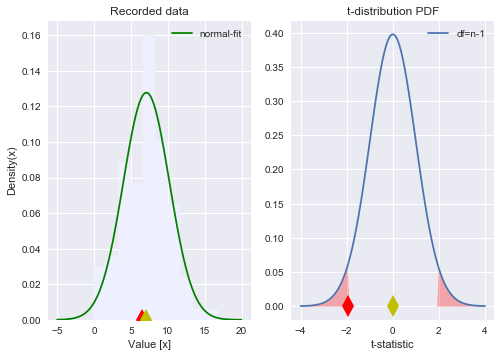

In [32]:
tFill = yv2.copy()
tFill[(xv2>-tstatistic) & (xv2<tstatistic)] = 0
axs[1].plot(xv2, yv2, label='df=n-1')
axs[1].fill_between(xv2, tFill, color='r', alpha=0.3, lw=0)
axs[1].plot(tVal, 0, 'rd', ms=15)
axs[1].plot(0, 0, 'yd', ms=15)
axs[1].set_xlabel('t-statistic')
axs[1].set_title('t-distribution PDF')
axs[1].legend()
plt.show()